<a id="case"></a> 

## **3 Walmart Sales Forecast**

**Dicionário de Dados**

* Store - número da loja.
* Date - semana da apuração das vendas.
* Weekly_Sales - quantidade de vendas de uma determinada loja.
* Holiday_Flag - 1 se for feriado; 0 caso contrário.
* Temperature - Temperatura na semana de apuração na região da loja
* Fuel_Price - Preço do combustível na região da loja, dados monetários em dólar.
* CPI – Consumer Price Index, índice de inflação ao consumidor na região da loja.
* Unemployment - Taxa de desemprego na região da loja.

**OBJETIVO DA MODELAGEM:** prever as vendas semanais do Walmart, dado o conjunto de dados disponível.

A ideia do time de negócio é utilizar o modelo para planejar ações como estoque e prospectar demanda. Além disso, objetiva-se compreender melhor a inserção e perfil da empresa e suas filiais.

##**Importando Bibliotecas**

In [ ]:
# Import manipulação
import pandas as pd
import numpy as np
from math import sqrt

# visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learnig - Sklearn

  # Modelo
from sklearn.linear_model import LinearRegression
  # Dividir em treino e teste
from sklearn.model_selection import train_test_split
  # Métricas para avaliar o modelo
from sklearn.metrics import r2_score, mean_squared_error

##**Importando o dados a partir do pandas**

In [ ]:
# Leitura de onde vem a base
df = pd.read_csv('/content/drive/MyDrive/Cursos Thiago/Bootcamp_01/1.Aula1/Walmart.csv')

In [ ]:
# Ler as 5 primeiras linhas
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Ler as 5 últimas linhas
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


#**Modelagem & EDA (Exploração)**

##**Tipos de dados**


In [ ]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Convertendo a coluna 'Date' para o tipo datetime

In [ ]:
df['Date'] = pd.to_datetime(df.Date, format='%d-%m-%Y')
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

##**Ordenando os dados por Date**

In [ ]:
df = df.sort_values(by= ['Date'], ascending = True).reset_index(drop = True)

##**Campos Nulos**


In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

- não tem dados nulos

##**Valores duplicados**


In [ ]:
df.duplicated().sum()

0

**- Não tem linhas duplicadas**

##**Valores únicos na tabela**

Serve para validar os dados - Caso não tenha dados incorretos

In [ ]:
df.nunique().sort_values(ascending = True)

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

**- Temos 45 lojas**

**- Holiday_Flag é uma dummy(0 ou 1)**

In [ ]:
df['Holiday_Flag'].unique()

array([0, 1])

##**Sumário estatístico**

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


**- Não achamos nenhuma inconsistência nos dados(vendas negativa, por exemplo)**

## Agora, vamos entender o comportamento de cada variável

Criando um DataFrame mensal - assim conseguir ver a venda mensal ao invés de semanal

In [ ]:
mes_data = df.set_index('Date').resample('m')[['Weekly_Sales', 'CPI', 'Unemployment']].mean()

In [ ]:
mes_data.head()

,Weekly_Sales,CPI,Unemployment
Date,,,
2010-02-28,1.057405e+06,167.834459,8.619311
2010-03-31,1.010666e+06,167.930846,8.619311
2010-04-30,1.028499e+06,167.678437,8.497711
2010-05-31,1.037283e+06,167.641758,8.497711
2010-06-30,1.068034e+06,168.004688,8.497711


Criando uma função para visualizar as variáveis ao longo do tempo

In [ ]:
# Criar uma figura e eixo
def grafico_linha_mes(feature, title, ylabel):
  fig, ax = plt.subplots(figsize=(10,4))
  # cálculo das vendas médias mensais
  mes_data[feature].plot(ax= ax, color='Black', linewidth=2)
  # labels
  # titulo
  plt.title(title, fontweight='bold', pad=15)
  # rotulo eixo x
  plt.xlabel('')
  # rotulo eixo y
  plt.ylabel(ylabel)
  plt.show()

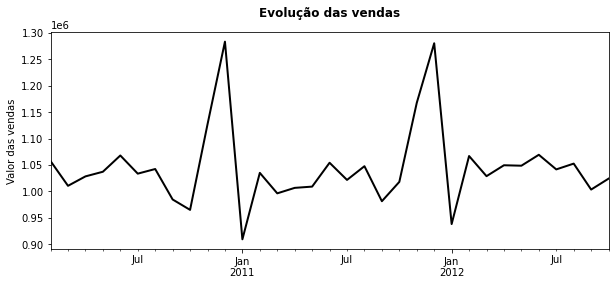

In [ ]:
grafico_linha_mes('Weekly_Sales', 'Evolução das vendas', 'Valor das vendas')

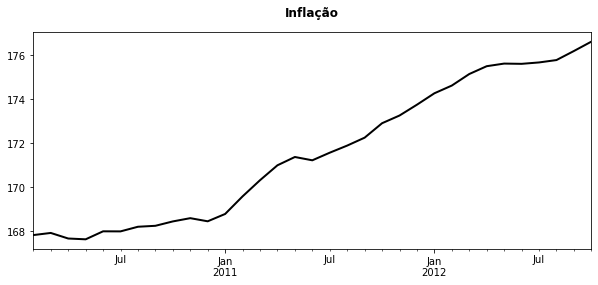

In [ ]:
grafico_linha_mes(
    'CPI', 
    'Inflação', 
    ''
)

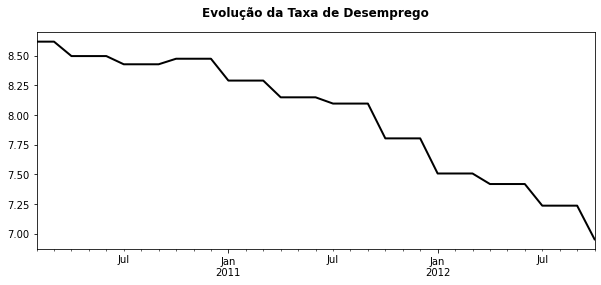

In [ ]:
grafico_linha_mes(
    'Unemployment', 
    'Evolução da Taxa de Desemprego', 
    ''
)

Criando uma função para comparar uma variável versus outra ao longo do tempo

In [ ]:

def grafico_duas_linha(eixo1,eixo2, title):
  # Criar uma figura e eixo
  fig, ax1 = plt.subplots(figsize=(10,4))
  # titulo
  plt.title(title, fontweight='bold', pad=15)
  # eixo1
  mes_data[eixo1].plot(ax=ax1, color='black', linewidth=2)
  ax1.set_ylabel(eixo1)
   # cria segundo eixo
  ax2 = ax1.twinx()
  mes_data[eixo2].plot(ax=ax2, color='lightgray', linewidth=2)
  ax2.set_ylabel(eixo2)
    
  # adiciona legenda
  fig.legend()
  plt.show()

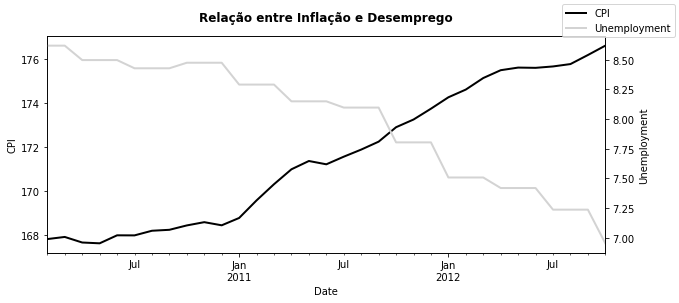

In [ ]:
grafico_duas_linha(
    'CPI', 
    'Unemployment', 
    'Relação entre Inflação e Desemprego'
)

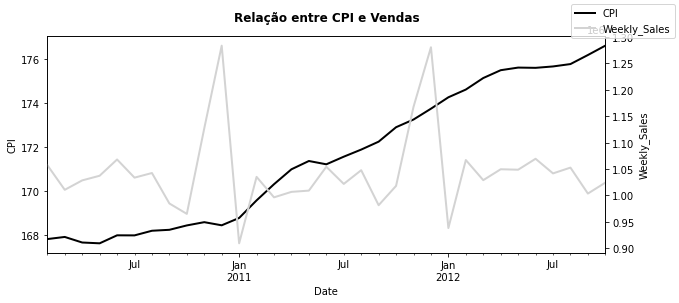

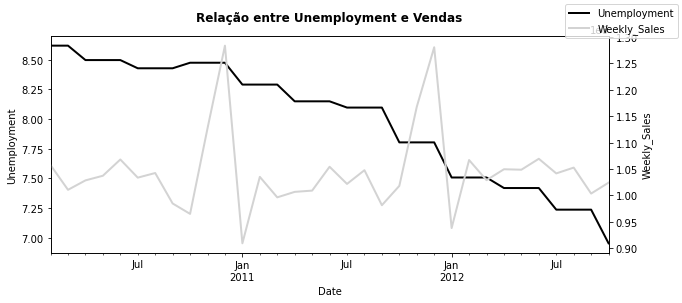

In [ ]:
for feature in ['CPI', 'Unemployment']:
    grafico_duas_linha(
        feature,
        'Weekly_Sales',
        f'Relação entre {feature} e Vendas'
    )

Verificando se as vendas em feriados são significativas para ter um peso maior na feature

In [ ]:
media_feriado=df.groupby('Holiday_Flag').mean()[['Weekly_Sales']]

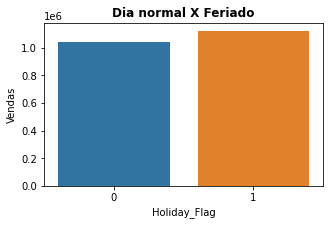

In [ ]:
plt.figure(figsize = (5,3))
sns.barplot(x = media_feriado.index, y = media_feriado['Weekly_Sales'], data = media_feriado)
plt.title('Dia normal X Feriado', fontweight = 'bold')
plt.ylabel('Vendas')
plt.show()

Não há uma diferença significativa.

## Análise Estatística

In [ ]:
# Lista com colunas numéricas
num_cols = df.select_dtypes(include = 'number').columns.tolist()

In [ ]:
num_cols

['Store',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


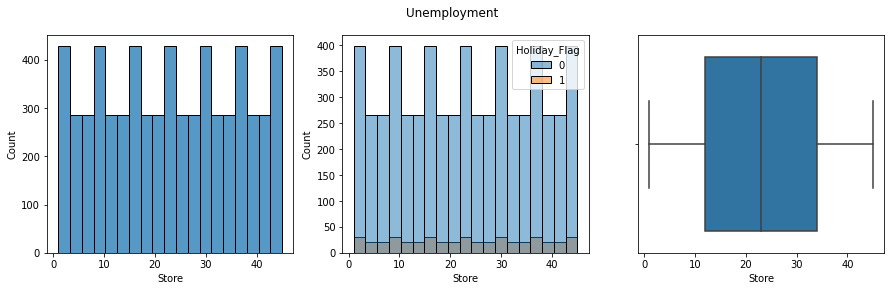

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


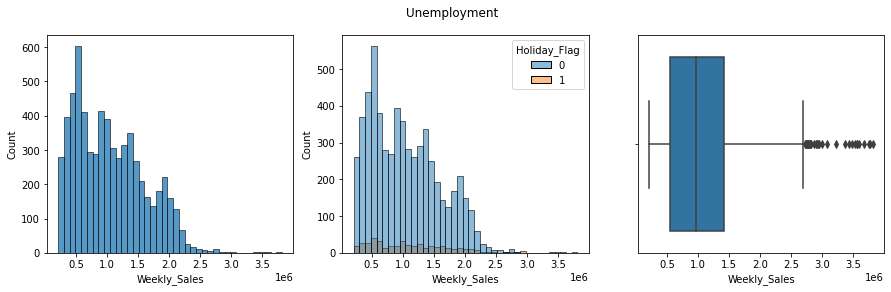

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


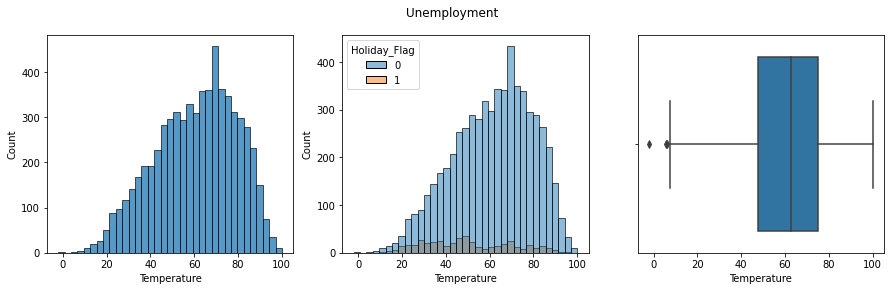

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


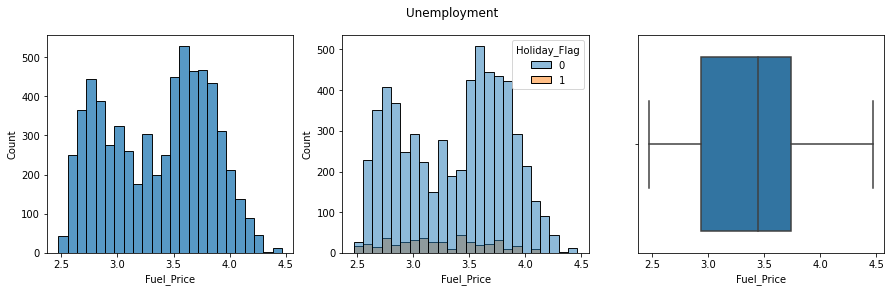

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


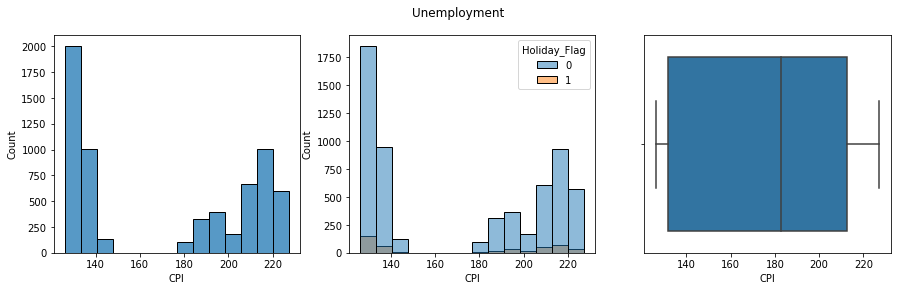

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


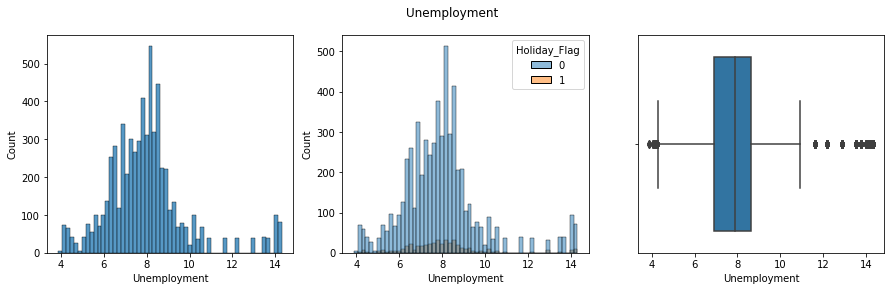

In [ ]:
for features in num_cols:
  # se for a variavel 'Holiday_Flag' vai pular
  if features == 'Holiday_Flag':
    continue
  # criar figura e o eixo - Os quadros onde ficam os quadros
  fig, ax = plt.subplots(1, 3, figsize=(15, 4))
  # Titulo da coluna
  fig.suptitle(feature)
  # Histograma
  sns.histplot(df[features], ax = ax[0])
  # Histograma 2
  sns.histplot(x = features, ax=ax[1], data = df, hue='Holiday_Flag')
  # Boxplot
  sns.boxplot(df[features], orient = 'h', ax = ax[2])
  plt.show()

## Criando função para visualizar a relação entre as variáveis independentes e dependente

In [ ]:
def plot_scatter(eixo_x, eixo_y, data):
    # ajusta tamanho da figura
    plt.figure(figsize=(8, 5))
    # scatter plot
    plt.scatter(eixo_x, eixo_y, data=data)
    # labels
    plt.title(f'Relação entre Weekly_Sales e {eixo_x}', fontweight='bold')
    plt.xlabel(eixo_x)
    plt.ylabel('Weekly_Sales')
    # configura gridlines
    plt.grid(alpha=0.3)
    plt.show()

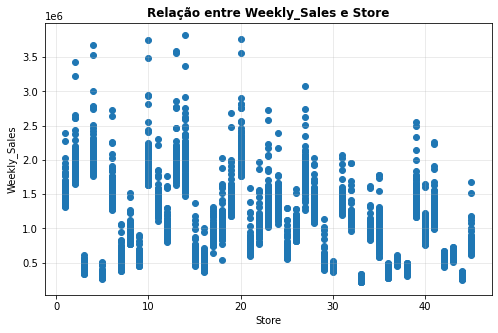

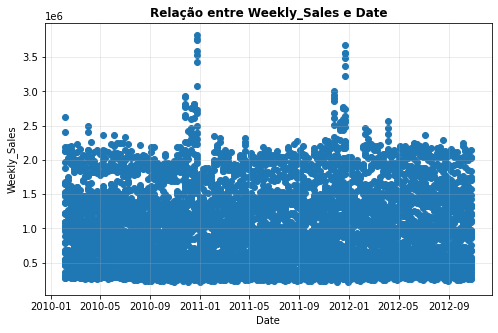

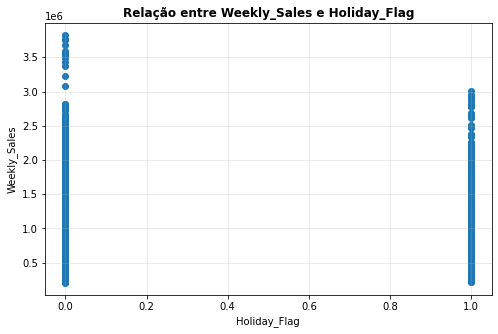

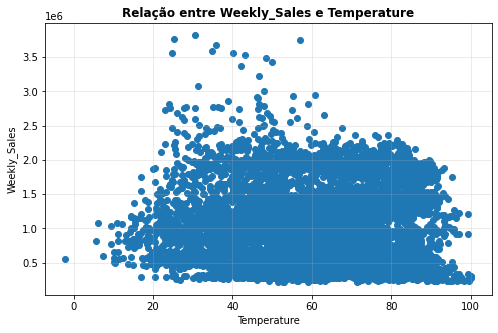

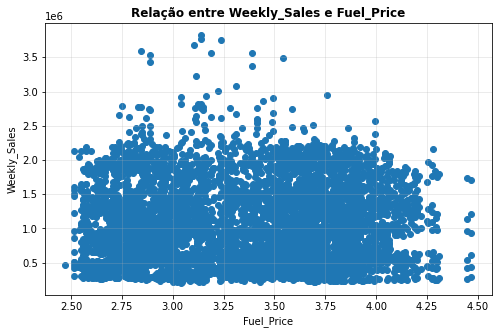

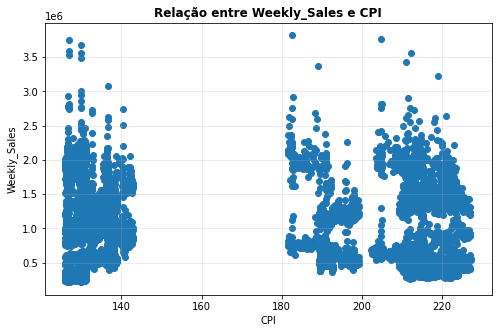

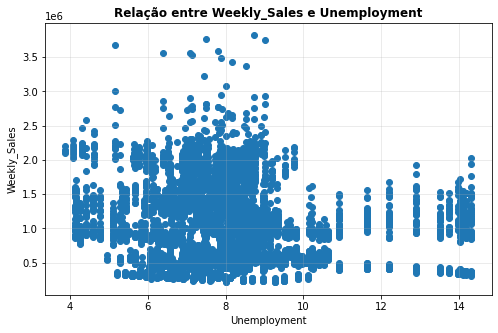

In [ ]:
for eixo_x in df.columns:
  if eixo_x == 'Weekly_Sales':
    continue
  plot_scatter(eixo_x, 'Weekly_Sales', data=df)

As variáveis não possuem tendências

##Por não possuir uma tendência linear, o ideal seria utilizar outro modelo de regressão. Mas, como é o meu primeiro projeto, utilizaremos o modelo regressão linear para treinar.

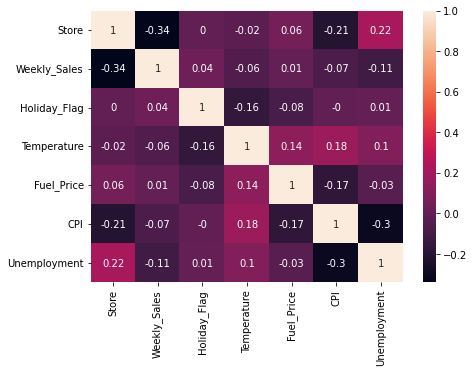

In [ ]:
# visualizar o mapa de correlação entre as variáveis
plt.figure(figsize= (7,5))
sns.heatmap(round(df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']].corr(),2), annot = True)

As variáveis não possuem correlação

- Separando as variáveis em X = features e y = Target

In [ ]:
X = df.drop(['Weekly_Sales'], axis = 1).set_index('Date')
y = df['Weekly_Sales']

- Separando variáveis em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state= 1, test_size = 0.3)

- Instanciando o modelo

In [ ]:
modelo_linear = LinearRegression()

- fitando o modelo com os dados de treino

In [ ]:
modelo_linear.fit(X_train, y_train)

LinearRegression()

- Retornando o intercepto do modelo

In [ ]:
modelo_linear.intercept_

2036425.490755355

- Retornando os parâmetros de inclinação

In [ ]:
modelo_linear.coef_

array([-15423.28057787,  22552.13965206,   -969.12852187,  10557.18481038,
        -2290.14357278, -26776.72614545])

- Previsão com os dados de treino e teste

In [ ]:
y_pred_train = modelo_linear.predict(X_train)
y_pred_test = modelo_linear.predict(X_test)

- Função para calcular o RMSE

In [ ]:
def rmse(y_true, y_pred):
    "Calcula o RMSE."
    return round(sqrt(mean_squared_error(y_true, y_pred)), 2)

In [ ]:
rmse(y_train, y_pred_train)

524079.86

In [ ]:
rmse(y_test, y_pred_test)

520952.65

- Métrica para ver a acurácia do modelo - Retornando o R2

In [ ]:
r2_score(y_train, y_pred_train)

0.14375749672752602

In [ ]:
r2_score(y_test, y_pred_test)

0.13181227261679562

- Podemos usar o 'Score' para calcular o R2 também

In [ ]:
modelo_linear.score(X_train, y_train)

0.14375749672752602

In [ ]:
modelo_linear.score(X_test, y_test)

0.13181227261679562

Podemos perceber pelas métricas que o modelo não é muito eficiente. Assim podemos utilizar outros modelos de Regressão. Mas como este é o primeiro projeto, só vamos utilizar a Regressão linear para treinar.

In [ ]:
X_train.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-11-12,15,0,39.63,3.065,132.978323,8.067
2010-05-21,42,0,78.32,3.120,126.184387,9.524
2011-04-29,10,0,73.38,4.151,128.999867,8.494
2010-10-29,29,0,57.73,2.938,132.870839,10.524
2011-09-16,4,0,72.76,3.532,129.430600,5.644


In [ ]:

lista = [20,1,50.63,	5,102.978323,8.067]
array = np.array(lista)

In [ ]:
array.reshape(1,-1)

array([[ 20.      ,   1.      ,  50.63    ,   5.      , 102.978323,
          8.067   ]])

In [ ]:
modelo_linear.predict(array.reshape(1, -1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1302387.97147047])